# Pregunta 5

(3 puntos) Con análisis morfológico analice la imagen llamada Ex3Preg5.tif

a. (1 punto) Haga una función que automáticamente cuente cuantas letras hay en la imagen.

b. (1 punto) Haga una función que automáticamente cuentecuantas letras mayúsiculas hay en la imagen, la función debe regresar también una tabla cuyas columnas indiquien el renglón y el número de letra en el que aparece la mayúsculaen dicho renglón, habrá una fila de esta tabla por cada mayúsucula encontrada.

c. (1 punto) Haga una función que automáticamente cuentecuantas letras “o”minúsculas hay en la imagen.La función debe regresar también una tabla cuyas columnas indiquien el renglón y el número de letra en el que aparece la “o”en dicho renglón, habrá una fila de esta tabla por cada “o”encontrada

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pytesseract

In [106]:
letritas = cv2.imread('imagenes/Ex3Preg5.tif', 0)

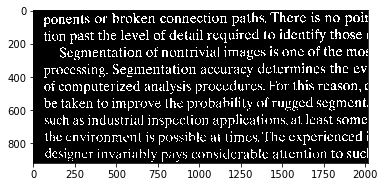

In [107]:
plt.imshow(letritas, cmap = 'gray');

Hay que deshacerse de las letras partidas de la orilla derecha.

In [108]:
ancho = letritas.shape[0]
largo = letritas.shape[1]
marcador = np.zeros((ancho, largo), dtype = "uint8")
marcador[0] = np.ones(largo, dtype = "uint8")
marcador[ancho - 1] = np.ones(largo, dtype = "uint8")
marcador[:, 0] = np.ones(ancho, dtype = "uint8").T
marcador[:, largo - 1] = np.ones(ancho, dtype = "uint8").T
marcador = marcador * letritas
marcador = np.uint8(marcador)

In [109]:
kernel = np.ones((3, 3), np.uint8)

In [110]:
D_vieja = marcador
D_nueva = np.bitwise_and(cv2.dilate(marcador, kernel, iterations = 1), letritas)

In [111]:
while np.array_equal(D_nueva, D_vieja) == False:
    D_vieja = D_nueva
    D_nueva = np.bitwise_and(cv2.dilate(D_nueva, kernel, iterations = 1), letritas)

In [112]:
letras_limpias = letritas - D_nueva

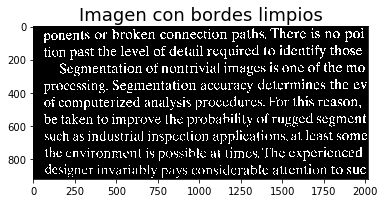

In [113]:
plt.imshow(letras_limpias, cmap = 'gray')
plt.title("Imagen con bordes limpios", size = 18);

In [115]:
letras_string = pytesseract.image_to_string(letras_limpias)

In [116]:
print(letras_string)

ponents or broken connection paths. There is no poi
tion past the level of detail required to identify those
Segmentation of nontrivial images is one of the mo
processing. Segmentation accuracy determines the ev
of computerized analysis procedures. For this reason,
be taken to improve the probability of rugged segment
such as industrial inspection applications, at least some
the environment is possible at timesThe experienced
designer invariably pays considerable attention to suc


In [120]:
puras_letras = letras_string.replace(" ", "")
puras_letras = puras_letras.replace(",", "")
puras_letras = puras_letras.replace(".","")
puras_letras = puras_letras.replace("\n", "")

In [121]:
print(puras_letras)

ponentsorbrokenconnectionpathsThereisnopoitionpastthelevelofdetailrequiredtoidentifythoseSegmentationofnontrivialimagesisoneofthemoprocessingSegmentationaccuracydeterminestheevofcomputerizedanalysisproceduresForthisreasonbetakentoimprovetheprobabilityofruggedsegmentsuchasindustrialinspectionapplicationsatleastsometheenvironmentispossibleattimesTheexperienceddesignerinvariablypaysconsiderableattentiontosuc


In [122]:
print("En total hay", len(puras_letras), "letras en la imagen")

En total hay 408 letras en la imagen


In [123]:
print("En total hay", puras_letras.count("o"), "letras o minúsculas")

En total hay 36 letras o minúsculas


In [125]:
print("En total hay", sum(1 for c in puras_letras if c.isupper()), "letras mayúsculas en la imagen")

En total hay 5 letras mayúsculas en la imagen


Hasta aquí le dejo, que lo de las columnas va a estar medio canijo.